<a href="https://colab.research.google.com/github/andradeMatheus96/Predict_Student_Performance/blob/main/Predict_Students_Perfomance_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

In [ ]:
pip install optuna

In [ ]:
!pip install openpyxl==3.0.9

In [39]:
# Carregar bibliotecas
import numpy as np                                    # Numpy
import pandas as pd                                   # Pandas
from sklearn.model_selection import train_test_split  # Scikit separar treino/teste
import pycaret                                        # Pycaret
from pycaret.classification import *                      # Pycaret para Regressão
from pycaret.utils import enable_colab                # Para executar gráficos no Colab
from google.colab import files
import io
import pandas_profiling
from imblearn.under_sampling import ClusterCentroids
import shap
import cufflinks as cf # para conectar o plotly ao pandas
import plotly.express as px
import plotly
enable_colab()

Colab mode enabled.


In [40]:
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)

In [41]:
%matplotlib

Using matplotlib backend: agg


In [42]:
%matplotlib inline

In [5]:
#uploaded = files.upload()

In [43]:
df = pd.read_csv('/content/student-mat.csv', delimiter=';')
dict_columns = pd.read_excel('/content/dictionary.xlsx')['Full_Name']
df.columns = dict_columns
df.head(5)

Full_Name school_name  ... student_final_grade
0                  GP  ...                   6
1                  GP  ...                   6
2                  GP  ...                  10
3                  GP  ...                  15
4                  GP  ...                  10

[5 rows x 33 columns]

In [7]:
#df[df['student_final_grade']==0].head(5)

In [8]:
#profile = pandas_profiling.ProfileReport(df, title='student-mat')
#profile.to_file('student-mat_v2.html')

# New Section

In [44]:
df['target'] = (df['student_final_grade']<=10)*1
df['target'].describe()

count    395.000000
mean       0.470886
std        0.499785
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [45]:
df['target'].value_counts()

0    209
1    186
Name: target, dtype: int64

In [11]:
clas = setup(
    data = df.drop(['student_first_period_grade','student_second_period_grade','student_final_grade'], axis=1),           # Banco de dados
              target = 'target',   # Desfecho que estamos tentando prever
              train_size = 0.8,
            session_id = 1911,
            feature_selection = True,
            feature_selection_threshold = 0.8,
            remove_multicollinearity = True, 
            multicollinearity_threshold = 0.9,
            fix_imbalance = True,
            fix_imbalance_method = ClusterCentroids(sampling_strategy=1, random_state=1911)
            )    

Description             Value
0                               session_id              1911
1                                   Target            target
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (395, 31)
5                           Missing Values             False
6                         Numeric Features                 1
7                     Categorical Features                29
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (316, 87)
12                    Transformed Test Set          (79, 87)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2106
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity              True
43             Multicollinearity Threshold               0.9
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection              True
53                Feature Selection Method           classic
54            Features Selection Threshold               0.8
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance              True
59                    Fix Imbalance Method  ClusterCentroids

In [13]:
compare_models(sort = 'Recall')

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.6014  0.6403  0.6638  0.5611   
xgboost         Extreme Gradient Boosting    0.6334  0.6553  0.6581  0.6070   
catboost              CatBoost Classifier    0.6547  0.6830  0.6429  0.6363   
ada                  Ada Boost Classifier    0.6137  0.6478  0.6419  0.5763   
rf               Random Forest Classifier    0.6392  0.6773  0.6376  0.6097   
gbc          Gradient Boosting Classifier    0.6103  0.6554  0.6276  0.5788   
et                 Extra Trees Classifier    0.6043  0.6626  0.6038  0.5728   
lr                    Logistic Regression    0.5953  0.6455  0.6029  0.5626   
ridge                    Ridge Classifier    0.5920  0.0000  0.5962  0.5666   
lda          Linear Discriminant Analysis    0.5918  0.6108  0.5890  0.5707   
dt               Decision Tree Classifier    0.5858  0.5855  0.5829  0.5663   
svm                   SVM - Linear Kernel    0.5983  0.0000  0.5662  0.5673   
knn                K Neighbors Classifier    0.5574  0.6080  0.3095  0.5318   
nb                            Naive Bayes    0.6014  0.6710  0.2538  0.6939   
qda       Quadratic Discriminant Analysis    0.5699  0.5352  0.0762  0.5667   
dummy                    Dummy Classifier    0.5381  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.6007  0.2082  0.2189     0.741  
xgboost   0.6222  0.2691  0.2768     3.033  
catboost  0.6300  0.3077  0.3149     2.451  
ada       0.6042  0.2288  0.2320     0.754  
rf        0.6134  0.2774  0.2847     1.163  
gbc       0.5952  0.2214  0.2267     0.753  
et        0.5794  0.2085  0.2146     1.121  
lr        0.5756  0.1904  0.1933     1.559  
ridge     0.5747  0.1848  0.1870     0.652  
lda       0.5747  0.1846  0.1843     0.656  
dt        0.5686  0.1724  0.1729     0.642  
svm       0.5599  0.1900  0.1940     0.646  
knn       0.3844  0.0823  0.0886     0.748  
nb        0.3662  0.1609  0.2060     0.721  
qda       0.1305  0.0749  0.1428     0.671  
dummy     0.0000  0.0000  0.0000     0.635

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1911, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
md = create_model('lightgbm')
md_rc = tune_model(md, optimize='Recall', n_iter = 50,search_library='optuna')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6875  0.6549  0.7333  0.6471  0.6875  0.3774  0.3804
1       0.6250  0.6471  0.6667  0.5882  0.6250  0.2529  0.2549
2       0.6250  0.7804  0.9333  0.5600  0.7000  0.2755  0.3456
3       0.7188  0.8196  0.6667  0.7143  0.6897  0.4331  0.4339
4       0.5938  0.6824  0.6667  0.5556  0.6061  0.1938  0.1972
5       0.5938  0.6941  0.6667  0.5556  0.6061  0.1938  0.1972
6       0.7097  0.8067  0.5714  0.7273  0.6400  0.4026  0.4108
7       0.6129  0.6092  0.4286  0.6000  0.5000  0.1983  0.2058
8       0.6774  0.8319  0.8571  0.6000  0.7059  0.3725  0.4021
9       0.5806  0.6933  0.7143  0.5263  0.6061  0.1792  0.1889
Mean    0.6424  0.7220  0.6905  0.6074  0.6366  0.2879  0.3017
SD      0.0486  0.0763  0.1320  0.0648  0.0599  0.0940  0.0967

In [24]:
md = create_model('gbc')
md_rc = tune_model(md, optimize='Recall', n_iter = 50,search_library='optuna')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5625  0.6235  0.5333  0.5333  0.5333  0.1216  0.1216
1       0.5625  0.5922  0.6000  0.5294  0.5625  0.1284  0.1294
2       0.5938  0.6353  0.7333  0.5500  0.6286  0.2000  0.2102
3       0.7812  0.8275  1.0000  0.6818  0.8108  0.5725  0.6333
4       0.6875  0.6627  0.6667  0.6667  0.6667  0.3725  0.3725
5       0.6875  0.6824  0.8667  0.6190  0.7222  0.3870  0.4161
6       0.7742  0.7815  0.7143  0.7692  0.7407  0.5412  0.5424
7       0.6129  0.6092  0.5000  0.5833  0.5385  0.2085  0.2103
8       0.6774  0.7185  0.7857  0.6111  0.6875  0.3648  0.3771
9       0.5161  0.5462  0.7143  0.4762  0.5714  0.0644  0.0716
Mean    0.6456  0.6679  0.7114  0.6020  0.6462  0.2961  0.3085
SD      0.0859  0.0826  0.1429  0.0823  0.0901  0.1687  0.1797

In [26]:
md = create_model('catboost')
md_rc = tune_model(md, optimize='Recall', n_iter = 50,search_library='optuna')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.6157  0.6000  0.6000  0.6000  0.2471  0.2471
1       0.5938  0.6118  0.6000  0.5625  0.5806  0.1875  0.1879
2       0.7500  0.7333  0.8667  0.6842  0.7647  0.5058  0.5220
3       0.8125  0.8510  0.9333  0.7368  0.8235  0.6293  0.6495
4       0.6562  0.7216  0.6667  0.6250  0.6452  0.3125  0.3131
5       0.5625  0.6902  0.6000  0.5294  0.5625  0.1284  0.1294
6       0.7097  0.8067  0.5714  0.7273  0.6400  0.4026  0.4108
7       0.6129  0.6176  0.5000  0.5833  0.5385  0.2085  0.2103
8       0.7097  0.7185  0.7143  0.6667  0.6897  0.4175  0.4184
9       0.5161  0.5798  0.7143  0.4762  0.5714  0.0644  0.0716
Mean    0.6548  0.6946  0.6767  0.6191  0.6416  0.3104  0.3160
SD      0.0861  0.0849  0.1284  0.0809  0.0882  0.1682  0.1732

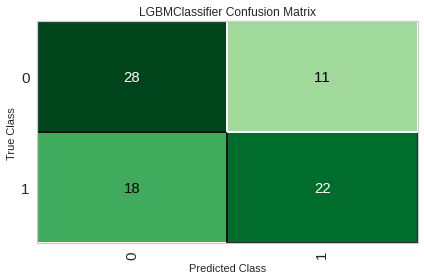

In [15]:
plot_model(md_rc, plot = 'confusion_matrix')

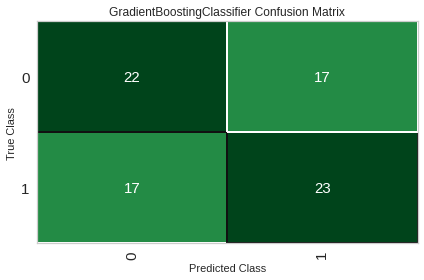

In [25]:
plot_model(md_rc, plot = 'confusion_matrix')

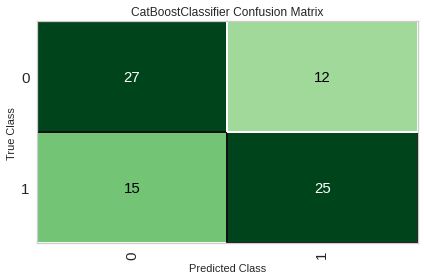

In [27]:
plot_model(md_rc, plot = 'confusion_matrix')

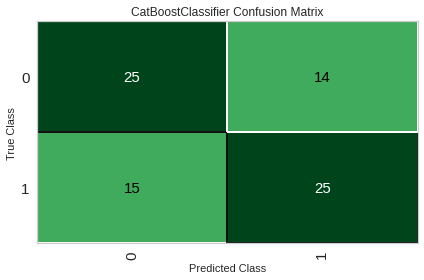

In [19]:
plot_model(md_rc, plot = 'confusion_matrix')

In [ ]:
md_rc = tune_model(md, optimize='Recall', n_iter = 100)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7188  0.6706  0.6000  0.7500  0.6667  0.4286  0.4366
1       0.5000  0.6157  0.4667  0.4667  0.4667 -0.0039 -0.0039
2       0.5625  0.6157  0.8000  0.5217  0.6316  0.1483  0.1697
3       0.7188  0.7804  0.8667  0.6500  0.7429  0.4462  0.4689
4       0.6562  0.6902  0.7333  0.6111  0.6667  0.3178  0.3235
5       0.6250  0.6745  0.6667  0.5882  0.6250  0.2529  0.2549
6       0.7419  0.7857  0.6429  0.7500  0.6923  0.4723  0.4765
7       0.6452  0.5588  0.5000  0.6364  0.5600  0.2698  0.2753
8       0.7097  0.6933  0.7857  0.6471  0.7097  0.4247  0.4328
9       0.5161  0.5882  0.7143  0.4762  0.5714  0.0644  0.0716
Mean    0.6394  0.6673  0.6776  0.6097  0.6333  0.2821  0.2906
SD      0.0831  0.0717  0.1226  0.0946  0.0778  0.1595  0.1612

In [ ]:
md_acc = tune_model(md, optimize='Accuracy')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.7902  0.9375  0.6250  0.7500  0.3056  0.3675
1       0.6333  0.6384  0.8750  0.6087  0.7179  0.2396  0.2738
2       0.7333  0.7098  0.8750  0.7000  0.7778  0.4545  0.4725
3       0.5667  0.6205  0.8125  0.5652  0.6667  0.1014  0.1158
4       0.6000  0.5778  0.9333  0.5600  0.7000  0.2000  0.2683
5       0.6000  0.7200  0.8667  0.5652  0.6842  0.2000  0.2364
6       0.6333  0.6756  0.8000  0.6000  0.6857  0.2667  0.2828
7       0.6552  0.7619  0.9333  0.6087  0.7368  0.2961  0.3583
8       0.7586  0.7667  0.8667  0.7222  0.7879  0.5132  0.5247
9       0.5517  0.4762  0.8667  0.5417  0.6667  0.0827  0.1071
Mean    0.6399  0.6737  0.8767  0.6097  0.7174  0.2660  0.3007
SD      0.0634  0.0926  0.0452  0.0567  0.0420  0.1301  0.1286

In [ ]:
md_f1 = tune_model(md, optimize='F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.7902  0.9375  0.6250  0.7500  0.3056  0.3675
1       0.6333  0.6384  0.8750  0.6087  0.7179  0.2396  0.2738
2       0.7333  0.7098  0.8750  0.7000  0.7778  0.4545  0.4725
3       0.5667  0.6205  0.8125  0.5652  0.6667  0.1014  0.1158
4       0.6000  0.5778  0.9333  0.5600  0.7000  0.2000  0.2683
5       0.6000  0.7200  0.8667  0.5652  0.6842  0.2000  0.2364
6       0.6333  0.6756  0.8000  0.6000  0.6857  0.2667  0.2828
7       0.6552  0.7619  0.9333  0.6087  0.7368  0.2961  0.3583
8       0.7586  0.7667  0.8667  0.7222  0.7879  0.5132  0.5247
9       0.5517  0.4762  0.8667  0.5417  0.6667  0.0827  0.1071
Mean    0.6399  0.6737  0.8767  0.6097  0.7174  0.2660  0.3007
SD      0.0634  0.0926  0.0452  0.0567  0.0420  0.1301  0.1286

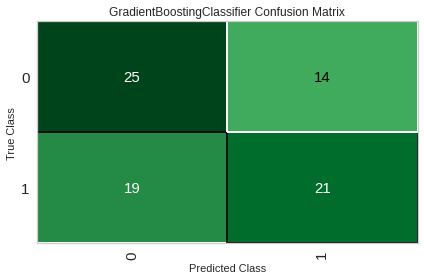

In [ ]:
plot_model(md, plot = 'confusion_matrix')

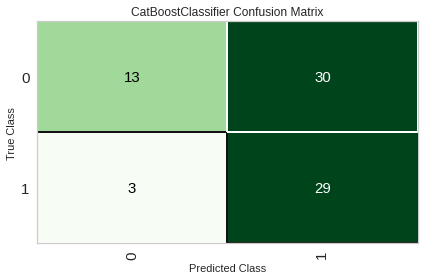

In [ ]:
plot_model(md_acc, plot = 'confusion_matrix')

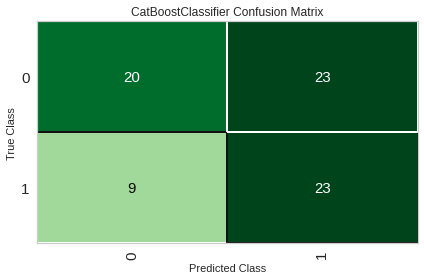

In [ ]:
plot_model(md_prec, plot = 'confusion_matrix')

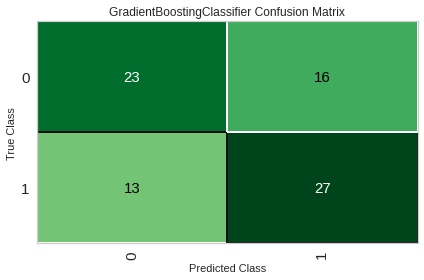

In [ ]:
plot_model(md_rc, plot = 'confusion_matrix')

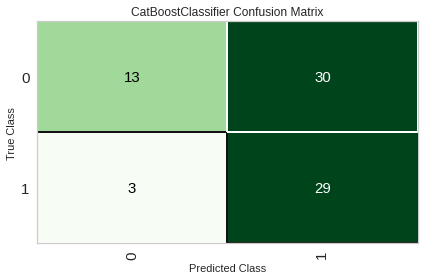

In [ ]:
plot_model(md_f1, plot = 'confusion_matrix')

In [ ]:
evaluate_model(md_rc, use_train_data = False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
predict_model(md_rc)

Model  Accuracy     AUC  Recall   Prec.      F1  Kappa     MCC
0  CatBoost Classifier    0.6582  0.6532   0.625  0.6757  0.6494  0.317  0.3179

student_reason_choose_school_reputation  ...   Score
0                                       0.0  ...  0.7180
1                                       1.0  ...  0.6315
2                                       1.0  ...  0.8328
3                                       0.0  ...  0.6922
4                                       0.0  ...  0.8043
..                                      ...  ...     ...
74                                      1.0  ...  0.5737
75                                      0.0  ...  0.7069
76                                      0.0  ...  0.5717
77                                      0.0  ...  0.6295
78                                      0.0  ...  0.5988

[79 rows x 90 columns]

In [ ]:
plot_model(md_prec, plot = 'feature',save = True)
plot_model(md_prec, plot = 'confusion_matrix',save = True)
plot_model(md_prec, plot = 'auc',save = True)

'AUC.png'

In [29]:
explainer = shap.Explainer(md_rc)
shap_values = explainer(get_config('X_train'))

In [30]:
vals = shap_values.abs.max(0).values
feature_names = get_config('X_train').columns
feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
feature_importance.head(25)

col_name  feature_importance_vals
6           student_number_past_failures_0                 1.358499
44              student_number_of_absences                 1.046664
77          student_number_past_failures_2                 0.951099
55             student_mother_job_services                 0.785307
76                          student_age_16                 0.719648
52    student_extra_educational_support_no                 0.624808
8                 student_parents_status_T                 0.593234
83                    student_study_time_3                 0.534266
7         student_free_time_after_school_2                 0.492147
16    student_workday_alcool_consumption_5                 0.454336
34          student_number_past_failures_3                 0.447643
11        student_going_out_with_friends_2                 0.439228
17              student_father_education_4                 0.436211
33              student_father_education_3                 0.423119
56    student_weekend_alcool_consumption_3                 0.420888
50       student_have_internet_at_home_yes                 0.385411
43        student_free_time_after_school_5                 0.380133
61                   student_travel_time_4                 0.353949
51              student_mother_job_at_home                 0.353786
47               student_mother_job_health                 0.331785
62  student_family_educational_support_yes                 0.330988
65        student_going_out_with_friends_5                 0.325152
54                 student_family_size_LE3                 0.302615
22              student_mother_education_2                 0.283995
21    student_weekend_alcool_consumption_2                 0.274082

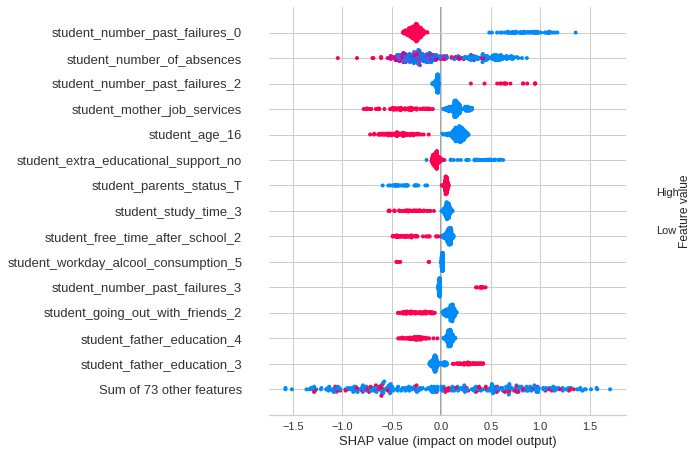

In [31]:
shap.plots.beeswarm(shap_values,max_display=15, order=shap_values.abs.max(0))

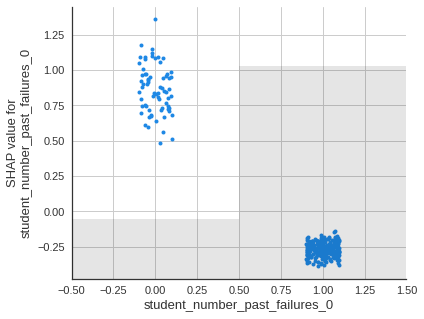

In [34]:
feature = 'student_number_past_failures_0'
xmin_per = get_config('X_train')[feature].quantile(0.01)
xmax_per = get_config('X_train')[feature].quantile(0.99)
#shap.plots.scatter(shap_values[:, feature], xmin=xmin_per, xmax=xmax_per)
#shap.plots.scatter(shap_values[:, feature], xmin=0, xmax=20)
shap.plots.scatter(shap_values[:, feature])

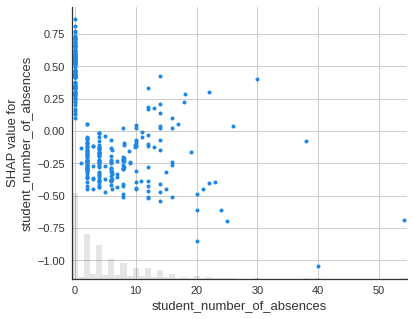

In [35]:
feature = 'student_number_of_absences'
xmin_per = get_config('X_train')[feature].quantile(0.01)
xmax_per = get_config('X_train')[feature].quantile(0.99)
#shap.plots.scatter(shap_values[:, feature], xmin=xmin_per, xmax=xmax_per)
#shap.plots.scatter(shap_values[:, feature], xmin=0, xmax=20)
shap.plots.scatter(shap_values[:, feature])

In [48]:
signal = "student_number_past_failures"
fig = px.histogram(x=df[signal], color=df["target"].replace(0,"Reproved").replace(1,"Approved"),barmode='group',
                   color_discrete_map={
                "Reproved": "red",
                "Approved": "blue"},
                labels={"color": ""})
fig.update_layout(
    xaxis_title=signal,
    yaxis_title='Number of Students')
fig.show()

In [ ]:
signal = 'student_study_time'
fig = px.box(x=X[signal], y=X["student_final_grade"],color=X["target"].replace(0,"Reproved").replace(1,"Approved"),
color_discrete_map={
                "Reproved": "red",
                "Approved": "blue"},
                labels={"color": ""})
fig.update_layout(
    xaxis_title=signal,
    yaxis_title='student_final_grade')
fig.show()

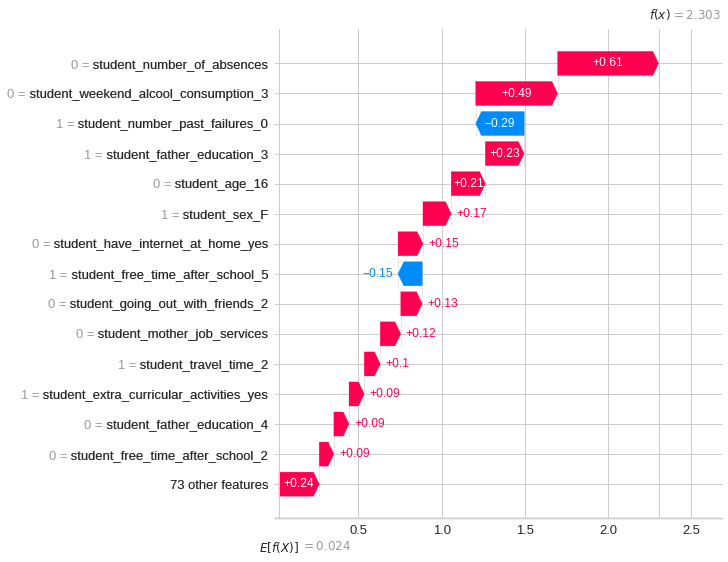

In [36]:
shap.plots.waterfall(shap_values[100],max_display=15)

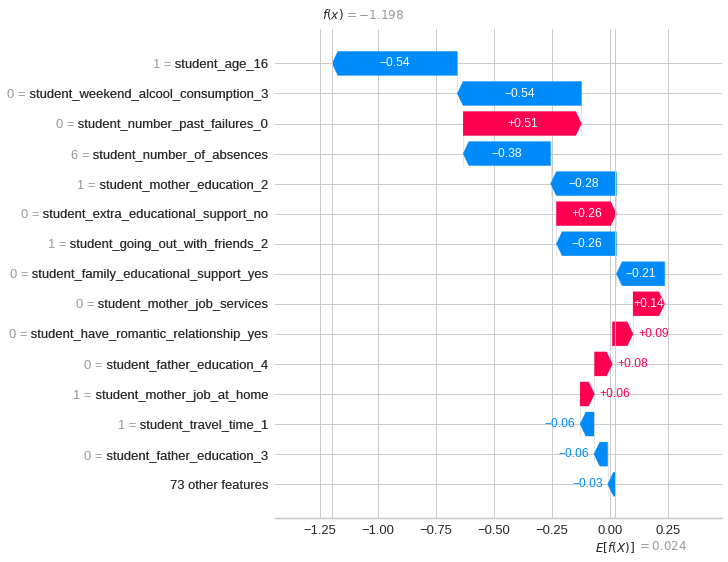

In [38]:
shap.plots.waterfall(shap_values[3],max_display=15)

In [ ]:
fig = px.histogram(X, x="student_final_grade", color="student_sex",barmode='group')
fig.show()

In [ ]:
fig = px.scatter(X, x="student_number_of_absences", y="student_final_grade", color='student_age')
fig.show()

In [ ]:
interpret_model(model_res_tun, plot = 'reason', observation = 20)

In [ ]:
save_model(model_res_tun, model_name = 'xgboost_classifier_matClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                max_delta_step=0, max_depth=8,
                                min_child_weight=2, missing=nan,
                                monotone_constraints='()', n_estimators=250,
                                n_jobs=-1, num_parallel_tree=1,
     

In [ ]:
mod_res = load_model('/content/xgboost_classifier_matClass')

Transformation Pipeline and Model Successfully Loaded
